In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
import sklearn
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [60]:
df= load_breast_cancer(return_X_y=True, as_frame=True)


In [61]:
df[0].head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [62]:
df[1].head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [51]:
X = df[0]
y = df[1]

<BarContainer object of 2 artists>

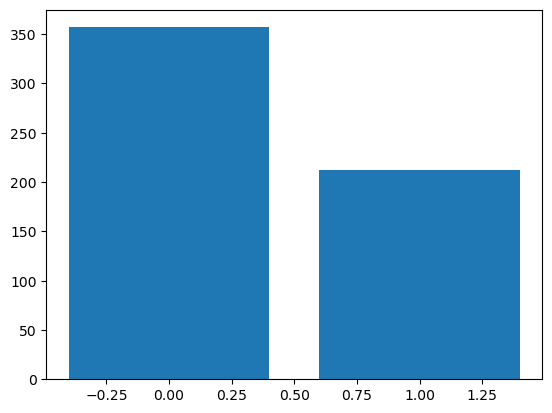

In [54]:
plt.bar([0,1],y.value_counts())

In [63]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=11,test_size=0.2)

In [64]:
scaler = StandardScaler()

In [65]:
X_train = scaler.fit_transform(X_train)

In [66]:
X_test = scaler.transform(X_test)

In [69]:

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    print(i,knn.score(X_test,y_test))



1 0.9385964912280702
2 0.9473684210526315
3 0.9649122807017544
4 0.9824561403508771
5 0.9736842105263158
6 0.9736842105263158
7 0.9736842105263158
8 0.9736842105263158
9 0.9736842105263158
10 0.9736842105263158
11 0.9736842105263158
12 0.9824561403508771
13 0.9736842105263158
14 0.9824561403508771
15 0.9824561403508771
16 0.9824561403508771
17 0.9824561403508771
18 0.9824561403508771
19 0.9649122807017544


In [70]:
#n can be 12

In [71]:
knn = KNeighborsClassifier(n_neighbors=12)

In [72]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=12)

In [73]:
knn.score(X_test,y_test)

0.9824561403508771

In [74]:
y_pred = knn.predict(X_test)

In [75]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0])

In [76]:
cm = confusion_matrix(y_test,y_pred)

In [77]:
cm

array([[36,  2],
       [ 0, 76]], dtype=int64)

In [78]:
cr = classification_report(y_test,y_pred)

In [79]:
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        38
           1       0.97      1.00      0.99        76

    accuracy                           0.98       114
   macro avg       0.99      0.97      0.98       114
weighted avg       0.98      0.98      0.98       114



<Axes: >

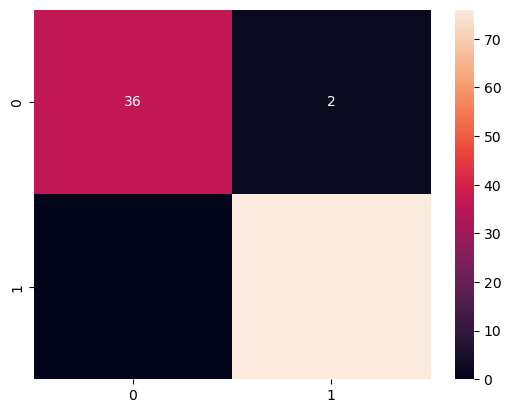

In [87]:
import seaborn as sns
sns.heatmap(cm, annot=True)